# Integrantes

1. a1805	Natalia Beatriz	Diaz

2. a1822	Cristian Patricio Salinas Talamilla

3. a1812	Ezequiel Eduardo Maudet

4. a1819	Manuel Pineyro

# Consigna
Se requiere construir una regresión que nos permita predecir el valor medio de las casas en distritos de California, EEUU (medidos en cientos de miles de dólares $100,000). Este dataset se deriva del censo de 1990 de EEUU, donde cada observación es un bloque. Un bloque es la unidad geográfica más pequeña para la cual la Oficina del Censo de EEUU publica datos de muestra (un bloque típicamente tiene una población de 600 a 3000 personas).

Los atributos, en el orden en que se guardaron en el dataset, son:

* MedInc: Ingreso medio en el bloque
* HouseAge: Edad mediana de las casas en el bloque
* AveRooms: Número promedio de habitaciones por hogar.
* AveBedrms: Número promedio de dormitorios por hogar.
* Population: Población del bloque add / 
* AveOccup: Número promedio de miembros por hogar.
* Latitude: Latitud del bloque
* Longitude: Longitud del bloque

Y el target es:


MedHouseVal: Mediana del costo de casas en el bloque (en unidades de a $100.000)


# Desarrollo - California Housing

## Ingesta de Datos

In [2]:
# Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression, Ridge

Este es un popular [dataset](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset) que vamos a estar leyendo desde **Scikit-Learn**.

Se requiere construir una regresión que nos permita predecir el valor de valor medio de casas en distritos de California (medidos en ciento de miles de dólares $100.000). Este dataset deriva del censo de 1990 de EEUU, donde cada observación es un bloque. Un bloque es la unidad geográfica más pequeña para la cual la Oficina del Censo de EE. UU. publica datos de muestra (un bloque típicamente tiene una población de 600 a 3,000 personas).

Un hogar es un grupo de personas que residen dentro de una casa. Dado que el número promedio de habitaciones y dormitorios en este conjunto de datos se proporciona por hogar, estas columnas pueden tomar valores grandes para grupos de bloques con pocos hogares y muchas casas vacías.

Los atributos en el orden que se guardaron en el dataset son:

- `MedInc`: Ingreso medio en el bloque
- `HouseAge`: Edad mediana de las casas en el bloque
- `AveRooms`: Número promedio de habitaciones por hogar.
- `AveBedrms`: Número promedio de dormitorios por hogar.
- `Population`: Población del bloque
- `AveOccup`: Número promedio de miembros por hogar.
- `Latitude`: Latitud del bloque
- `Longitude`: Longitud del bloque

In [5]:
# Leemos el dataset
california_housing = fetch_california_housing()

# Y obtenemos los atributos y target
X = california_housing.data
y = california_housing.target
print(X)
print(y)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]
[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [6]:
california_housing['feature_names']

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [7]:
california_housing['target_names']

['MedHouseVal']

In [12]:
# Transformamos en Pandas DataSet
X = pd.DataFrame(X, columns=california_housing['feature_names'])
y = pd.Series(y, name=california_housing['target_names'][0])

# Unimos a X e y, esto ayuda a la parte de la gráfica del mapa de calor de correlación
df_california = pd.concat([X, y], axis=1)

In [13]:
df_california.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
df_california.info()

## Consiga 1:
Obtener la correlación entre los atributos y los atributos con el target. ¿Cuál atributo tiene mayor correlación lineal con el target y cuáles atributos parecen estar más correlacionados entre sí? Se puede obtener los valores o directamente graficar usando un mapa de calor.

In [14]:
df_california.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [22]:
df_california.corr()[['MedHouseVal']].sort_values(['MedHouseVal'], ascending=False)

,MedHouseVal
MedHouseVal,1.000000
MedInc,0.688075
AveRooms,0.151948
HouseAge,0.105623
AveOccup,-0.023737
Population,-0.024650
Longitude,-0.045967
AveBedrms,-0.046701
Latitude,-0.144160


Text(0.5, 1.0, 'Coeficientes de correlación (Pearson)')

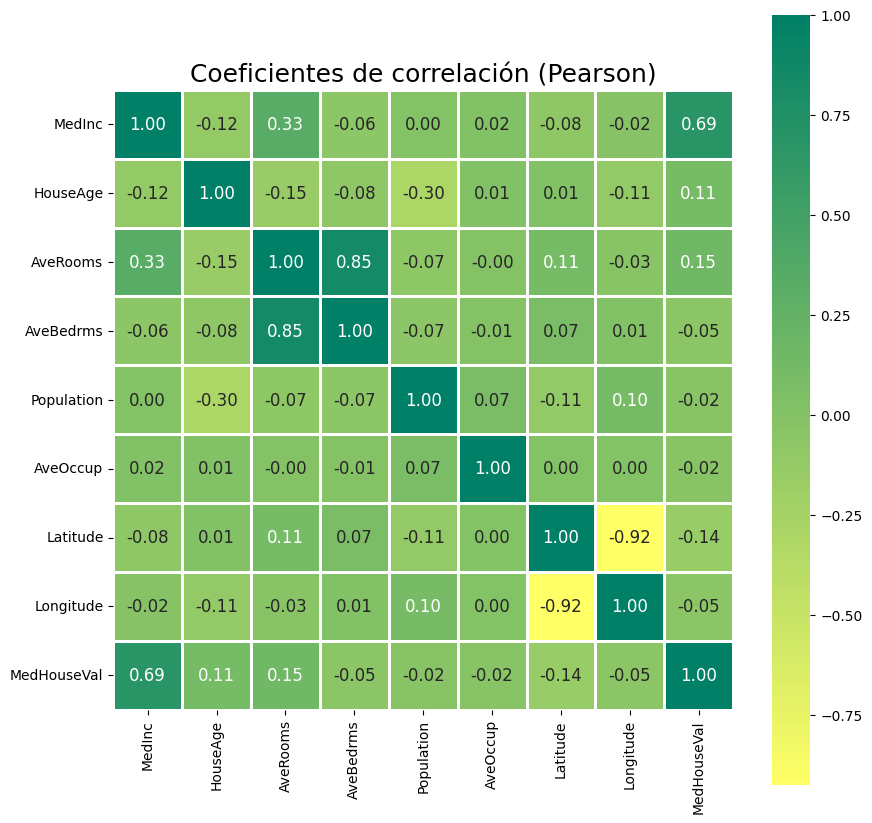

In [26]:
plt.figure(figsize = (5,5))
sns.heatmap(df_california.corr(), 
            cbar = True, 
            square = True, 
            annot=True, 
            fmt= '.2f',
            annot_kws={'size': 12}, 
            cmap= 'summer_r', 
            linewidths=1)
plt.xticks(rotation = 90)
#plt.yticks(rotation = 45)
plt.gcf().set_size_inches(10, 10)
plt.title("Coeficientes de correlación (Pearson)", fontsize = 18, color = "black")

Text(0.5, 1.0, 'Coeficientes de correlación (Pearson)')

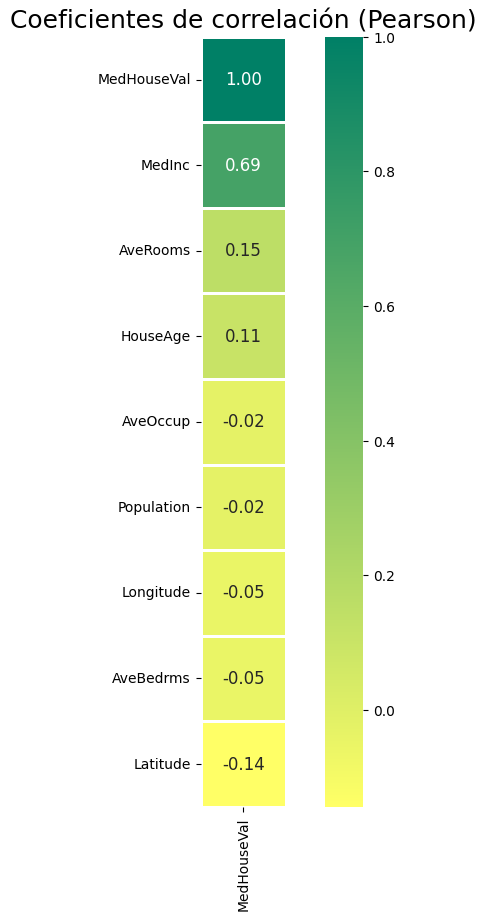

In [27]:
plt.figure(figsize = (5,5))
sns.heatmap(df_california.corr()[['MedHouseVal']].sort_values(['MedHouseVal'], ascending=False), 
            cbar = True, 
            square = True, 
            annot=True, 
            fmt= '.2f',
            annot_kws={'size': 12}, 
            cmap= 'summer_r', 
            linewidths=1)
plt.xticks(rotation = 90)
#plt.yticks(rotation = 45)
plt.gcf().set_size_inches(10, 10)
plt.title("Coeficientes de correlación (Pearson)", fontsize = 18, color = "black")

In [37]:
# Crear la grilla de gráficos
sns.pairplot(df_california, kind='reg')

In [32]:
df_california.columns.drop('MedHouseVal')

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

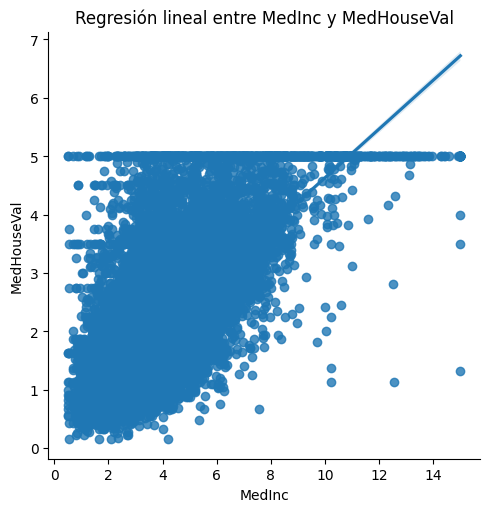

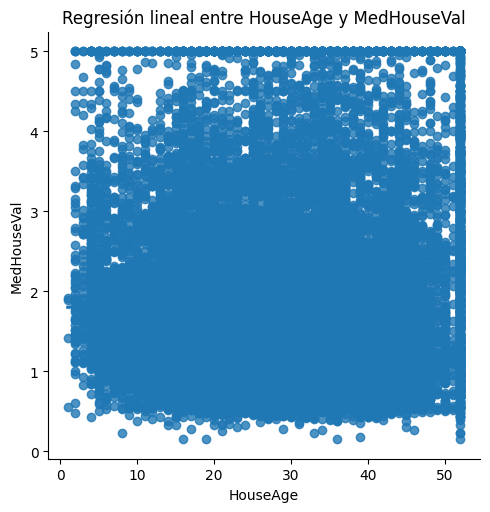

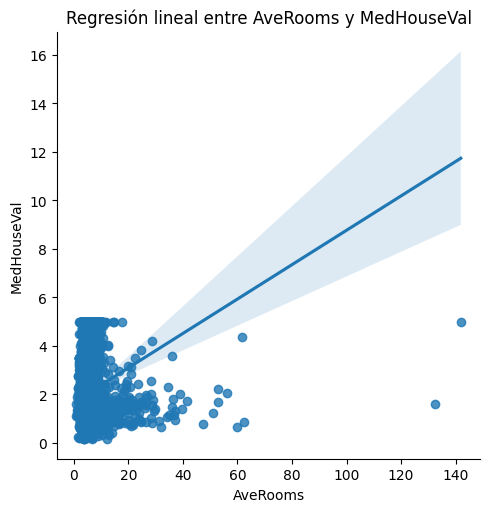

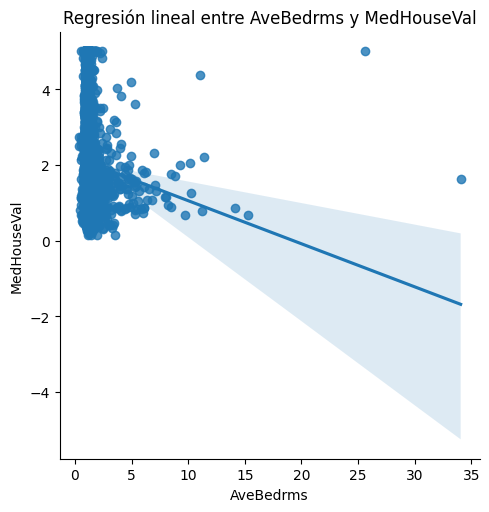

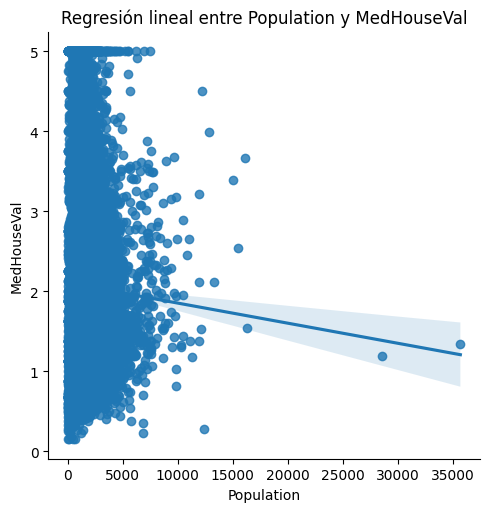

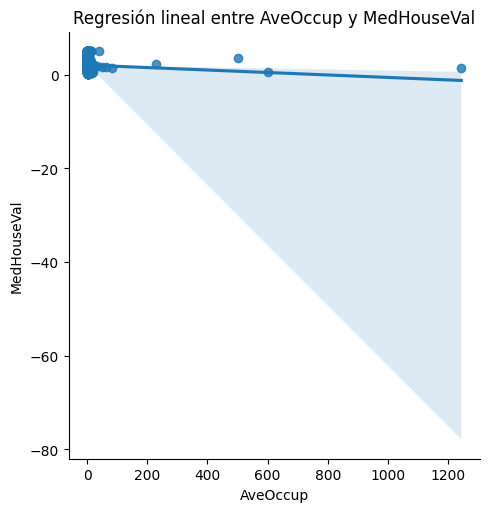

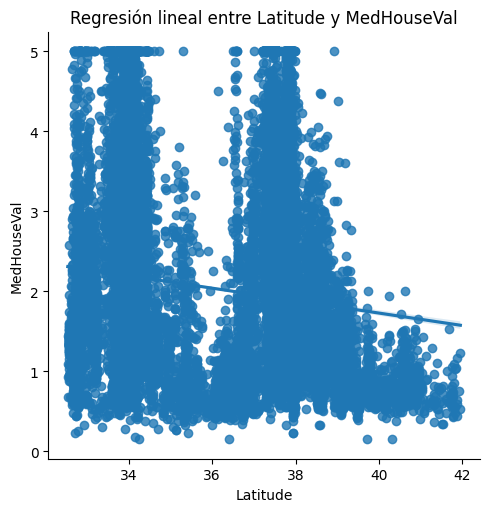

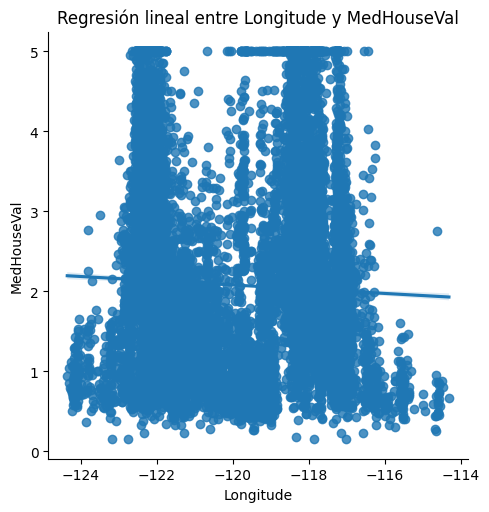

In [36]:
# Listar las columnas excepto 'MedHouseVal'
columnas = df_california.columns.drop('MedHouseVal')

# Generar un lmplot entre cada columna y 'MedHouseVal'
for columna in columnas:
    sns.lmplot(x=columna, y='MedHouseVal', data=df_california)
    plt.title(f'Regresión lineal entre {columna} y MedHouseVal')
    plt.show()